In [64]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

ADDITIONAL FUNCTIONS

In [65]:
def scale(X_train, X_test):
    scaler = StandardScaler()
    X_scaler = scaler.fit(X_train)

    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

def get_acc_score(y_test, predictions):
    acc_score = accuracy_score(y_test, predictions)
    acc_score
    return acc_score
    

**DATA PRE-PROCESSING**

In [66]:
data_2003_2004 = pd.read_csv('data/2003-2004.csv')
data_2004_2005 = pd.read_csv('data/2004-2005.csv')
data_2005_2006 = pd.read_csv('data/2005-2006.csv')
data_2006_2007 = pd.read_csv('data/2006-2007.csv')
data_2007_2008 = pd.read_csv('data/2007-2008.csv')
data_2008_2009 = pd.read_csv('data/2008-2009.csv')
data_2009_2010 = pd.read_csv('data/2009-2010.csv')
data_2010_2011 = pd.read_csv('data/2010-2011.csv')
data_2011_2012 = pd.read_csv('data/2011-2012.csv')
data_2012_2013 = pd.read_csv('data/2012-2013.csv')
data_2013_2014 = pd.read_csv('data/2013-2014.csv')
data_2014_2015 = pd.read_csv('data/2014-2015.csv')
data_2015_2016 = pd.read_csv('data/2015-2016.csv')
data_2016_2017 = pd.read_csv('data/2016-2017.csv')
data_2017_2018 = pd.read_csv('data/2017-2018.csv')
data_2018_2019 = pd.read_csv('data/2018-2019.csv')
data_2019_2020 = pd.read_csv('data/2019-2020.csv')
data_2020_2021 = pd.read_csv('data/2020-2021.csv')
data_2021_2022 = pd.read_csv('data/2021-2022.csv')

data_df = pd.concat([data_2003_2004,data_2004_2005,data_2005_2006,data_2006_2007,data_2007_2008,data_2008_2009,data_2009_2010,data_2010_2011,data_2011_2012,data_2012_2013,data_2013_2014,data_2014_2015,data_2015_2016,data_2016_2017,data_2017_2018,data_2018_2019,data_2019_2020,data_2020_2021,data_2021_2022])

data_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Shareef Abdur-Rahim\abdursh01,PF,27,TOT,85,56,2684,6.7,14.1,...,0.869,2.5,6.0,8.6,2.3,0.9,0.5,2.5,3.0,18.6
1,1,Shareef Abdur-Rahim\abdursh01,PF,27,ATL,53,53,1956,7.0,14.5,...,0.880,2.6,6.5,9.1,2.3,0.8,0.3,2.4,2.7,19.6
2,1,Shareef Abdur-Rahim\abdursh01,PF,27,POR,32,3,728,5.8,13.1,...,0.832,2.4,4.7,7.1,2.3,1.2,0.9,2.6,3.7,15.8
3,2,Malik Allen\allenma01,PF,25,MIA,45,6,616,4.9,11.6,...,0.758,2.5,4.5,7.0,0.9,0.7,1.6,1.6,4.7,11.2
4,3,Ray Allen*\allenra02,SG,28,SEA,56,56,2152,7.5,17.0,...,0.904,1.2,3.6,4.8,4.5,1.2,0.2,2.6,2.2,21.5


In [67]:
shaped_data_df = data_df.shape

In [68]:
# remove players with less than 10 minutes per game = 820
data_df = data_df[data_df.MP >= 820]
data_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Shareef Abdur-Rahim\abdursh01,PF,27,TOT,85,56,2684,6.7,14.1,...,0.869,2.5,6.0,8.6,2.3,0.9,0.5,2.5,3.0,18.6
1,1,Shareef Abdur-Rahim\abdursh01,PF,27,ATL,53,53,1956,7.0,14.5,...,0.880,2.6,6.5,9.1,2.3,0.8,0.3,2.4,2.7,19.6
4,3,Ray Allen*\allenra02,SG,28,SEA,56,56,2152,7.5,17.0,...,0.904,1.2,3.6,4.8,4.5,1.2,0.2,2.6,2.2,21.5
5,4,Rafer Alston\alstora01,PG,27,MIA,82,28,2581,4.0,10.7,...,0.769,0.4,2.8,3.2,5.2,1.6,0.3,1.8,3.0,11.7
6,5,Chris Andersen\anderch01,PF,25,DEN,71,0,1029,3.1,7.1,...,0.589,3.1,7.3,10.4,1.2,1.2,4.0,1.7,4.2,8.5


In [69]:
# select single position
data_df = data_df.replace("PG-SG","PG")
data_df = data_df.replace("PG-SF","PG")
data_df = data_df.replace("SG-SF","SG")
data_df = data_df.replace("SG-PG","SG")
data_df = data_df.replace("SG-PF","SG")
data_df = data_df.replace("SF-PF","SF")
data_df = data_df.replace("SF-SG","SF")
data_df = data_df.replace("PF-C","PF")
data_df = data_df.replace("PF-SF","PF")
data_df = data_df.replace("C-PF","C")

# filter important stats
df_filt = data_df[['PTS', 'TRB', 'ORB', 'AST', 'STL', 'BLK', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'PF', 'TOV', 'Pos']]
df_filt = df_filt.dropna()

# round 2 decimasl
df_filt = df_filt.round({'PTS': 2})
df_filt = df_filt.round({'TRB': 2})
df_filt = df_filt.round({'ORB': 2})
df_filt = df_filt.round({'AST': 2})
df_filt = df_filt.round({'STL': 2})
df_filt = df_filt.round({'BLK': 2})
df_filt = df_filt.round({'FG': 2})
df_filt = df_filt.round({'FGA': 2})
df_filt = df_filt.round({'FG%': 2})
df_filt = df_filt.round({'3P': 2})
df_filt = df_filt.round({'3PA': 2})
df_filt = df_filt.round({'3P%': 2})
df_filt = df_filt.round({'2P': 2})
df_filt = df_filt.round({'2PA': 2})
df_filt = df_filt.round({'2P%': 2})
df_filt = df_filt.round({'FT': 2})
df_filt = df_filt.round({'FTA': 2})
df_filt = df_filt.round({'FT%': 2})
df_filt = df_filt.round({'PF': 2})
df_filt = df_filt.round({'TOV': 2})


In [70]:
print('Shape before conversion:', shaped_data_df)
print('Shape after conversion:', df_filt.shape)

Shape before conversion: (11692, 29)
Shape after conversion: (5584, 21)


In [71]:
df = df_filt
df.loc[:,"Pos"].value_counts()

SG    1317
PG    1210
PF    1141
SF    1113
C      803
Name: Pos, dtype: int64

**DATA VISUALIZATION**

In [72]:
summ_by_pos = df_filt.groupby("Pos").mean()
summ_by_pos

,PTS,TRB,ORB,AST,STL,BLK,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,PF,TOV
Pos,,,,,,,,,,,,,,,,,,,,
C,15.025405,10.182690,3.142590,2.149440,0.918431,1.541469,5.927397,11.510959,0.518804,0.361768,1.070361,0.179477,5.563387,10.437484,0.536040,2.801993,3.991781,0.700000,3.902615,2.040224
PF,15.147853,8.129448,2.196933,2.267835,1.019457,0.889921,5.775110,12.359597,0.466775,1.009290,2.857230,0.273523,4.765995,9.499825,0.501648,2.580631,3.483436,0.737038,3.370990,1.856880
PG,15.274959,3.954380,0.699008,6.225702,1.348099,0.265207,5.542893,12.864380,0.428893,1.481736,4.172645,0.337603,4.057851,8.695207,0.463554,2.708099,3.363719,0.797471,2.691983,2.546942
SF,14.571968,5.590207,1.229380,2.534771,1.162713,0.555705,5.314376,12.018059,0.440773,1.467565,4.095597,0.339991,3.845822,7.922372,0.486469,2.476280,3.190566,0.767305,2.842138,1.754897
SG,15.627259,4.227563,0.805467,3.233561,1.175247,0.366515,5.645938,13.090888,0.430683,1.799393,4.937509,0.352726,3.845482,8.153986,0.472156,2.535004,3.160213,0.795953,2.654746,1.903189


<AxesSubplot:title={'center':'Stats across all 5 positions'}, ylabel='Pos'>

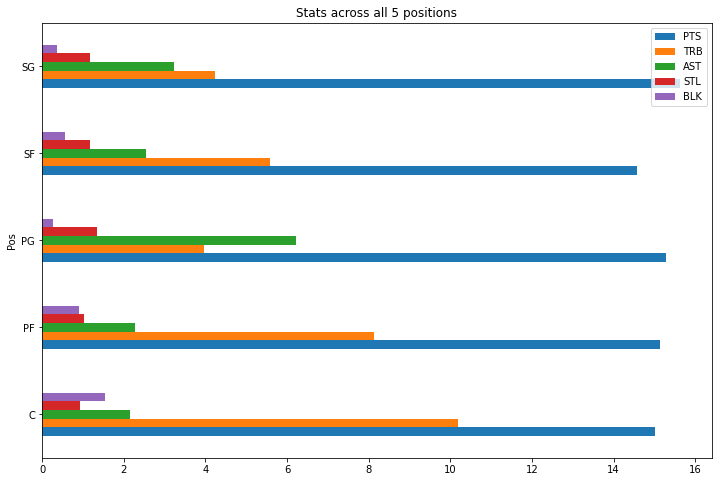

In [73]:
summ_by_pos[['PTS', 'TRB', 'AST', 'STL', 'BLK']].plot(kind = 'barh',figsize = (12, 8), title='Stats across all 5 positions')

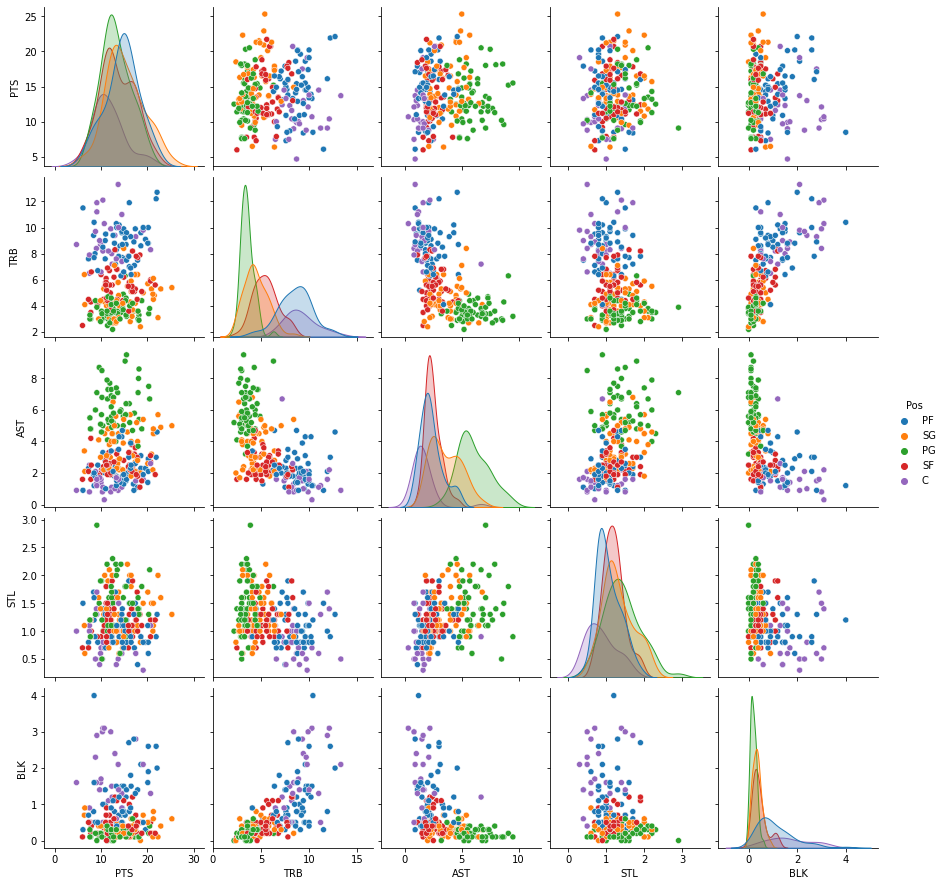

In [74]:
# pairwise
summ_pair = df[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'Pos']].head(250)
summ_pair = summ_pair.reset_index()
#summ_pair
summ_pair = summ_pair.drop('index', axis = 1)
sns.pairplot(summ_pair, hue = 'Pos')

**DECISION TREE, all features WITHOUT PCA**

In [75]:
df1_decision_tree = df.copy()
x = df1_decision_tree.drop("Pos", axis = 1)
y = df1_decision_tree.loc[:, 'Pos']
pos_dict = {
    "PG":1,
    "SG":2,
    "SF":3,
    "PF":4,
    "C":5
}
y = y.map(pos_dict).values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1, stratify=y)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test:", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (4188, 20)
y_train:  (4188, 1)
X_test: (1396, 20)
y_test:  (1396, 1)


In [76]:
# scaling X data
X_train_scaled, X_test_scaled = scale(X_train, X_test)

In [77]:
model_dt1 = tree.DecisionTreeClassifier(random_state=1)
model_dt1 = model_dt1.fit(X_train_scaled, y_train)
predictions = model_dt1.predict(X_test_scaled)
model_dt1_accuracy_score = get_acc_score(y_test, predictions)

In [78]:
dt1_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(dt1_class_report)

              precision    recall  f1-score   support

          PG       0.79      0.79      0.79       303
          SG       0.56      0.56      0.56       329
          SF       0.50      0.49      0.50       278
          PF       0.55      0.56      0.56       285
           C       0.66      0.67      0.66       201

    accuracy                           0.61      1396
   macro avg       0.61      0.61      0.61      1396
weighted avg       0.61      0.61      0.61      1396



In [79]:
# FEATURE SELECTION
dt1_importances = pd.DataFrame(model_dt1.feature_importances_, index = X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
dt1_importances

,Importance
TRB,0.243194
AST,0.193083
BLK,0.066295
ORB,0.043109
STL,0.042435
PF,0.042129
3P%,0.035502
3PA,0.034016
TOV,0.030909
2PA,0.029991


DECISION TREE, all features WITH PCA

In [80]:
df2_decision_tree = df.copy()

x = df2_decision_tree.drop('Pos', axis = 1)
y = df2_decision_tree.loc[:,'Pos']

y = y.map(pos_dict).values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 1, stratify=y)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test:", X_test.shape)
print("y_test: ", y_test.shape)

# scaling X data
X_train_scaled, X_test_scaled = scale(X_train, X_test)

X_train:  (4188, 20)
y_train:  (4188, 1)
X_test: (1396, 20)
y_test:  (1396, 1)


In [81]:
pca = PCA(n_components = 3)
X_pca = pca.fit(X_train_scaled)

X_train_pca = X_pca.transform(X_train_scaled)
X_test_pca = X_pca.transform(X_test_scaled)

X_train_pca_df = pd.DataFrame(data = X_train_pca, columns = ['PC1', 'PC2', 'PC3'])
X_test_pca_df = pd.DataFrame(data = X_test_pca, columns = ['PC1', 'PC2', 'PC3'])
X_train_pca_df.head()

,PC1,PC2,PC3
0,5.503236,0.734000,-2.503647
1,5.481144,4.169176,-0.569564
2,2.302384,4.379071,0.270950
3,-0.498015,1.145001,0.530034
4,-2.145143,-1.796613,-1.848394


In [82]:
pca.explained_variance_ratio_

array([0.32448637, 0.27303737, 0.09857903])

In [83]:
model_dt2 = tree.DecisionTreeClassifier(random_state=1)
model_dt2 = model_dt1.fit(X_train_pca, y_train)
predictions = model_dt2.predict(X_test_pca)
model_dt2_accuracy_score = get_acc_score(y_test, predictions)

In [84]:
dt2_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(dt2_class_report)

              precision    recall  f1-score   support

          PG       0.64      0.61      0.63       303
          SG       0.40      0.43      0.42       329
          SF       0.38      0.39      0.39       278
          PF       0.38      0.38      0.38       285
           C       0.57      0.55      0.56       201

    accuracy                           0.47      1396
   macro avg       0.48      0.47      0.47      1396
weighted avg       0.47      0.47      0.47      1396



    Based on initial scores, better results for decision tree without PCA   

**DECISION TREE, WITH top features WITHOUT PCA**

In [85]:
df3_decision_tree = df.copy()
# selecting top 5 features
df3_decision_tree = df3_decision_tree[['TRB', 'AST', 'BLK', 'PF', 'STL', 'Pos']]

x = df3_decision_tree.drop('Pos', axis=1)
y = df3_decision_tree.loc[:, 'Pos']

y = y.map(pos_dict).values.reshape(-1,1)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (4188, 5)
y_train: (4188, 1)
X_test: (1396, 5)
y_test: (1396, 1)


In [87]:
X_train_scaled, X_test_scaled = scale(X_train, X_test)

In [88]:
model_dt3 = tree.DecisionTreeClassifier(random_state=1)
model_dt3 = model_dt3.fit(X_train_scaled, y_train)
predictions = model_dt3.predict(X_test_scaled)

In [90]:
dt3_accuracy_score = get_acc_score(y_test, predictions)

In [91]:
dt3_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(dt3_class_report)

              precision    recall  f1-score   support

          PG       0.81      0.77      0.79       303
          SG       0.55      0.58      0.57       329
          SF       0.45      0.46      0.46       278
          PF       0.53      0.51      0.52       285
           C       0.64      0.67      0.65       201

    accuracy                           0.60      1396
   macro avg       0.60      0.60      0.60      1396
weighted avg       0.60      0.60      0.60      1396



    Slightly better results for 1st decision tree using all features, instead of using topn features

**RANDOM FOREST WITH all features**

In [92]:
df1_rand_for = df1_decision_tree.copy()

x = df1_rand_for.drop('Pos', axis = 1)
y = df1_rand_for.loc[:,'Pos']

y = y.map(pos_dict).values.reshape(-1,1)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (4188, 20)
y_train: (4188, 1)
X_test: (1396, 20)
y_test: (1396, 1)


In [94]:
X_train_scaled, X_test_scaled = scale(X_train, X_test)

In [95]:
model_rf1 = RandomForestClassifier(n_estimators=500, random_state=1)
model_rf1 = model_rf1.fit(X_train_scaled, y_train)
predictions = model_rf1.predict(X_test_scaled)

<ipython-input-95-de777f1b22a4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf1 = model_rf1.fit(X_train_scaled, y_train)


In [96]:
rf1_accuracy_score = get_acc_score(y_test, predictions)

In [97]:
rf1_class_report = classification_report(y_test, predictions, target_names=['PG', 'SG', 'SF', 'PF', 'C'])
print(rf1_class_report)

              precision    recall  f1-score   support

          PG       0.89      0.87      0.88       303
          SG       0.68      0.67      0.68       329
          SF       0.60      0.63      0.61       278
          PF       0.69      0.70      0.70       285
           C       0.80      0.77      0.78       201

    accuracy                           0.73      1396
   macro avg       0.73      0.73      0.73      1396
weighted avg       0.73      0.73      0.73      1396



In [98]:
# feature importance
rf1_importances = pd.DataFrame(model_rf1.feature_importances_, index = X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)
rf1_importances

,Importance
AST,0.150446
TRB,0.145116
ORB,0.077328
BLK,0.070501
3PA,0.046277
TOV,0.044179
STL,0.041248
PF,0.039729
3P,0.035813
FG%,0.033399


**RANDOM FOREST WITH top features**

In [99]:
df2_rand_for = df1_decision_tree.copy()
df2_rand_for = df2_rand_for[['AST', 'TRB', 'ORB', 'BLK', '3PA', 'Pos']]

x = df2_rand_for.drop('Pos', axis = 1)
y = df2_rand_for.loc[:,'Pos']

y = y.map(pos_dict).values.reshape(-1,1)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (4188, 5)
y_train: (4188, 1)
X_test: (1396, 5)
y_test: (1396, 1)


In [101]:
X_train_scaled, X_test_scaled = scale(X_train, X_test)

In [102]:
model_rf2 = RandomForestClassifier(n_estimators=500, random_state=1)
model_rf2 = model_rf2.fit(X_train_scaled, y_train)
predictions = model_rf2.predict(X_test_scaled)

<ipython-input-102-8a292fc1b17e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf2 = model_rf2.fit(X_train_scaled, y_train)


In [103]:
rf2_accuracy_score = get_acc_score(y_test, predictions)

In [104]:
rf2_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
print(rf2_class_report)

              precision    recall  f1-score   support

          PG       0.86      0.85      0.86       303
          SG       0.65      0.64      0.64       329
          SF       0.52      0.57      0.54       278
          PF       0.61      0.59      0.60       285
           C       0.71      0.70      0.70       201

    accuracy                           0.67      1396
   macro avg       0.67      0.67      0.67      1396
weighted avg       0.67      0.67      0.67      1396



    best results using 1st random forest model

**SVM WITH all features**

In [105]:
df1_svm = df1_decision_tree.copy()

x = df1_svm.drop('Pos', axis=1)
y = df1_svm.loc[:, 'Pos']

y = y.map(pos_dict).values.reshape(-1,1)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (4188, 20)
y_train: (4188, 1)
X_test: (1396, 20)
y_test: (1396, 1)


In [107]:
X_train_scaled, X_test_scaled = scale(X_train, X_test)

In [108]:
model_svm1 = svm.SVC(kernel = 'linear', random_state=1)
model_svm1 = model_svm1.fit(X_train_scaled, y_train)
predictions = model_svm1.predict(X_test_scaled)

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [109]:
svm1_accuracy_score = get_acc_score(y_test, predictions)

In [110]:
svm1_class_report = classification_report(y_test, predictions,  target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
svm1_class_report

'              precision    recall  f1-score   support\n\n          PG       0.88      0.88      0.88       303\n          SG       0.65      0.70      0.67       329\n          SF       0.58      0.56      0.57       278\n          PF       0.67      0.67      0.67       285\n           C       0.76      0.71      0.74       201\n\n    accuracy                           0.71      1396\n   macro avg       0.71      0.70      0.71      1396\nweighted avg       0.71      0.71      0.71      1396\n'

**SVM WITH top features**

In [111]:
df2_svm = df1_decision_tree.copy()
df2_svm = df2_svm[['AST', 'BLK', 'TRB', '2P', 'FTA', 'Pos']]

x = df2_svm.drop('Pos', axis = 1)
y = df2_svm.loc[:, 'Pos']
y = y.map(pos_dict).values.reshape(-1,1)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (4188, 5)
y_train: (4188, 1)
X_test: (1396, 5)
y_test: (1396, 1)


In [113]:
X_train_scaled, X_test_scaled = scale(X_train, X_test)

In [114]:
model_svm2 = svm.SVC(kernel = 'linear', random_state=1)
model_svm2 = model_svm2.fit(X_train_scaled, y_train)
predictions = model_svm2.predict(X_test_scaled)

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [115]:
svm2_accuracy_score = get_acc_score(y_test, predictions)

In [116]:
svm2_class_report = classification_report(y_test, predictions, target_names = ['PG', 'SG', 'SF', 'PF', 'C'])
svm2_class_report

'              precision    recall  f1-score   support\n\n          PG       0.86      0.83      0.85       303\n          SG       0.61      0.71      0.66       329\n          SF       0.51      0.47      0.49       278\n          PF       0.62      0.60      0.61       285\n           C       0.72      0.68      0.70       201\n\n    accuracy                           0.66      1396\n   macro avg       0.67      0.66      0.66      1396\nweighted avg       0.66      0.66      0.66      1396\n'

Best results for SVM using ALL features

**GRADIENT BOOSTING with ALL features**

In [118]:
df1_gb = df1_decision_tree.copy()

x = df1_gb.drop('Pos', axis = 1)
y = df1_gb.loc[:, 'Pos']

y = y.map(pos_dict).values.reshape(-1,1)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify=y)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (4188, 20)
y_train: (4188, 1)
X_test: (1396, 20)
y_test: (1396, 1)


In [121]:
X_train_scaled, X_test_scaled = scale(X_train, X_test)